In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_excel('Food_combinations_Rellow.xlsx')

In [ ]:
df.head(5)

,Food_id,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Vit_C_(mg),Vit_B6_(mg),Vit_B12_(µg),Vit_A_IU,Cholestrl_(mg),GmWt_Desc2
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,0.06,0.06,24.0,0.02,2.0,24.0,714.0,0.09,0.0,0.003,0.17,2499.0,215.0,1 tbsp
1,1002,"BUTTER,WHIPPED,WITH SALT",15.87,717,0.85,81.11,0.06,0.06,24.0,0.16,2.0,26.0,827.0,0.05,0.0,0.003,0.13,2499.0,219.0,1 tbsp
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,4.0,0.00,0.0,5.0,2.0,0.01,0.0,0.001,0.01,3069.0,256.0,1 tbsp
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,2.34,0.50,528.0,0.31,23.0,256.0,1395.0,2.66,0.0,0.166,1.22,763.0,75.0,1 cubic inch
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,2.79,0.51,674.0,0.43,24.0,136.0,560.0,2.60,0.0,0.065,1.26,1080.0,94.0,"1 cup, shredded"


In [ ]:
df.shape

(8194, 20)

In [ ]:
df.isnull().sum()

Food_id              0
Shrt_Desc            0
Water_(g)            6
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Carbohydrt_(g)       0
Sugar_Tot_(g)     2055
Calcium_(mg)       364
Iron_(mg)          147
Magnesium_(mg)     743
Potassium_(mg)     462
Sodium_(mg)         83
Zinc_(mg)          757
Vit_C_(mg)         799
Vit_B6_(mg)        993
Vit_B12_(µg)      1228
Vit_A_IU           715
Cholestrl_(mg)     360
GmWt_Desc2        3851
dtype: int64

In [ ]:
df=df.rename(columns={'Vit_B12_(µg)':'vitB12'})
df.dropna(subset = ["vitB12"], inplace=True)
df = df.fillna(('0'))

In [ ]:
df.head(20)

,Food_id,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Vit_C_(mg),Vit_B6_(mg),vitB12,Vit_A_IU,Cholestrl_(mg),GmWt_Desc2
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,0.06,0.06,24,0.02,2,24,714,0.09,0,0.003,0.17,2499,215,1 tbsp
1,1002,"BUTTER,WHIPPED,WITH SALT",15.87,717,0.85,81.11,0.06,0.06,24,0.16,2,26,827,0.05,0,0.003,0.13,2499,219,1 tbsp
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0,4,0,0,5,2,0.01,0,0.001,0.01,3069,256,1 tbsp
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,2.34,0.5,528,0.31,23,256,1395,2.66,0,0.166,1.22,763,75,1 cubic inch
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,2.79,0.51,674,0.43,24,136,560,2.6,0,0.065,1.26,1080,94,"1 cup, shredded"
5,1006,"CHEESE,BRIE",48.42,334,20.75,27.68,0.45,0.45,184,0.5,20,152,629,2.38,0,0.235,1.65,592,100,"1 cup, sliced"
6,1007,"CHEESE,CAMEMBERT",51.8,300,19.80,24.26,0.46,0.46,388,0.33,20,187,842,2.38,0,0.227,1.30,820,72,1 oz
7,1008,"CHEESE,CARAWAY",39.28,376,25.18,29.20,3.06,0,673,0.64,22,93,690,2.94,0,0.074,0.27,1054,93,0
8,1009,"CHEESE,CHEDDAR",36.75,403,24.90,33.14,1.28,0.52,721,0.68,28,98,621,3.11,0,0.074,0.83,1002,105,"1 cup, melted"
9,1010,"CHEESE,CHESHIRE",37.65,387,23.37,30.60,4.78,0,643,0.21,21,95,700,2.79,0,0.074,0.83,985,103,0


In [ ]:
df.isnull().sum()

Food_id           0
Shrt_Desc         0
Water_(g)         0
Energ_Kcal        0
Protein_(g)       0
Lipid_Tot_(g)     0
Carbohydrt_(g)    0
Sugar_Tot_(g)     0
Calcium_(mg)      0
Iron_(mg)         0
Magnesium_(mg)    0
Potassium_(mg)    0
Sodium_(mg)       0
Zinc_(mg)         0
Vit_C_(mg)        0
Vit_B6_(mg)       0
vitB12            0
Vit_A_IU          0
Cholestrl_(mg)    0
GmWt_Desc2        0
dtype: int64

In [ ]:
df=df.rename(columns={'Shrt_Desc':'Content'})
df.shape

(6966, 20)

**Working on content**

In [ ]:
list3=['Food','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']

In [ ]:
df_content=df['Content']

In [ ]:
df_content=df_content.str.split(',',expand=True)

In [ ]:
df_content.columns=list3
df_content.head(190)

,Food,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,BUTTER,WITH SALT,None,None,None,None,None,None,None,None,None
1,BUTTER,WHIPPED,WITH SALT,None,None,None,None,None,None,None,None
2,BUTTER OIL,ANHYDROUS,None,None,None,None,None,None,None,None,None
3,CHEESE,BLUE,None,None,None,None,None,None,None,None,None
4,CHEESE,BRICK,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
192,YOGURT,CHOC,NONFAT MILK,FORT W/ VITAMIN D,None,None,None,None,None,None,None
193,PROTEIN SUPP,MILK BSD,MUSCLE MILK,PDR,None,None,None,None,None,None,None
194,PROTEIN SUPP,MILK BSD,MUSCLE MILK LT,PDR,None,None,None,None,None,None,None
195,DULCE DE LECHE,None,None,None,None,None,None,None,None,None,None


In [ ]:
df_content.nunique()

Food    1203
C1      1716
C2      1602
C3       872
C4       435
C5       191
C6        81
C7        53
C8        30
C9         9
C10        2
dtype: int64

In [ ]:
df_content= df_content.drop(columns=['C10','C9'])

In [ ]:
df_content.nunique()

Food    1203
C1      1716
C2      1602
C3       872
C4       435
C5       191
C6        81
C7        53
C8        30
dtype: int64

In [ ]:
df=df.merge(df_content,how='inner',left_index=True,right_index=True)
df=df.drop(columns=['Content'])

In [ ]:
df.head(5)

,Food_id,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Vit_C_(mg),Vit_B6_(mg),vitB12,Vit_A_IU,Cholestrl_(mg),GmWt_Desc2,Food,C1,C2,C3,C4,C5,C6,C7,C8
0,1001,15.87,717,0.85,81.11,0.06,0.06,24,0.02,2,24,714,0.09,0,0.003,0.17,2499,215,1 tbsp,BUTTER,WITH SALT,None,None,None,None,None,None,None
1,1002,15.87,717,0.85,81.11,0.06,0.06,24,0.16,2,26,827,0.05,0,0.003,0.13,2499,219,1 tbsp,BUTTER,WHIPPED,WITH SALT,None,None,None,None,None,None
2,1003,0.24,876,0.28,99.48,0.00,0,4,0,0,5,2,0.01,0,0.001,0.01,3069,256,1 tbsp,BUTTER OIL,ANHYDROUS,None,None,None,None,None,None,None
3,1004,42.41,353,21.40,28.74,2.34,0.5,528,0.31,23,256,1395,2.66,0,0.166,1.22,763,75,1 cubic inch,CHEESE,BLUE,None,None,None,None,None,None,None
4,1005,41.11,371,23.24,29.68,2.79,0.51,674,0.43,24,136,560,2.6,0,0.065,1.26,1080,94,"1 cup, shredded",CHEESE,BRICK,None,None,None,None,None,None,None


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



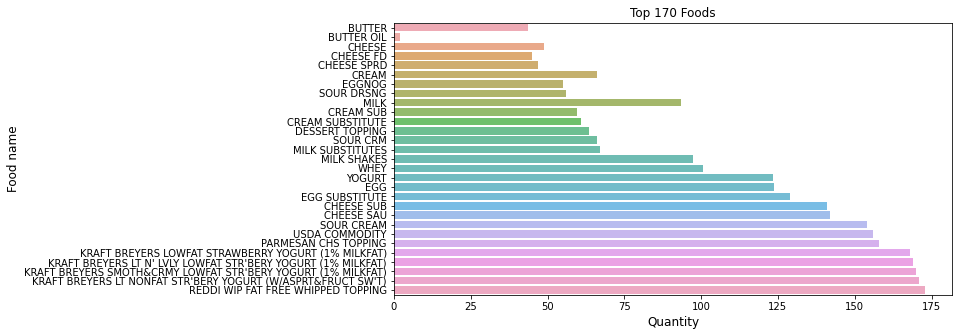

In [ ]:
val  = df['Food'].value_counts()
val = df.Food[0:170]
plt.figure(figsize=(10,5))
sns.barplot(val.index, val.values, alpha=0.8,ci=None)
plt.title('Top 170 Foods')
plt.ylabel('Food name', fontsize=12)
plt.xlabel('Quantity', fontsize=12)
plt.show()

In [ ]:
df.head(2)

,Food_id,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Vit_C_(mg),Vit_B6_(mg),vitB12,Vit_A_IU,Cholestrl_(mg),GmWt_Desc2,Food,C1,C2,C3,C4,C5,C6,C7,C8
0,1001,15.87,717,0.85,81.11,0.06,0.06,24,0.02,2,24,714,0.09,0,0.003,0.17,2499,215,1 tbsp,BUTTER,WITH SALT,None,None,None,None,None,None,None
1,1002,15.87,717,0.85,81.11,0.06,0.06,24,0.16,2,26,827,0.05,0,0.003,0.13,2499,219,1 tbsp,BUTTER,WHIPPED,WITH SALT,None,None,None,None,None,None


In [ ]:
df['Water_(g)'] = df['Water_(g)'].astype(float)
df['Protein_(g)']=df['Protein_(g)'].astype(float)
df['Sugar_Tot_(g)']=df['Sugar_Tot_(g)'].astype(float)
df['Protein_(g)']=df['Protein_(g)'].astype(float)
df['Calcium_(mg)']=df['Calcium_(mg)'].astype(int)
df['Iron_(mg)']=df['Iron_(mg)'].astype(float)
df['Magnesium_(mg)']=df['Magnesium_(mg)'].astype(int)
df['Potassium_(mg)']=df['Potassium_(mg)'].astype(int)
df['Sodium_(mg)']=df['Sodium_(mg)'].astype(int)
df['Zinc_(mg)']=df['Zinc_(mg)'].astype(float)
df['Vit_C_(mg)']=df['Vit_C_(mg)'].astype(float)
df['Vit_B6_(mg)']=df['Vit_B6_(mg)'].astype(float)
df['Vit_A_IU']=df['Vit_A_IU'].astype(int)
df['Cholestrl_(mg)']=df['Cholestrl_(mg)'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6966 entries, 0 to 8193
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Food_id         6966 non-null   int64  
 1   Water_(g)       6966 non-null   float64
 2   Energ_Kcal      6966 non-null   int64  
 3   Protein_(g)     6966 non-null   float64
 4   Lipid_Tot_(g)   6966 non-null   float64
 5   Carbohydrt_(g)  6966 non-null   float64
 6   Sugar_Tot_(g)   6966 non-null   float64
 7   Calcium_(mg)    6966 non-null   int64  
 8   Iron_(mg)       6966 non-null   float64
 9   Magnesium_(mg)  6966 non-null   int64  
 10  Potassium_(mg)  6966 non-null   int64  
 11  Sodium_(mg)     6966 non-null   int64  
 12  Zinc_(mg)       6966 non-null   float64
 13  Vit_C_(mg)      6966 non-null   float64
 14  Vit_B6_(mg)     6966 non-null   float64
 15  vitB12          6966 non-null   float64
 16  Vit_A_IU        6966 non-null   int64  
 17  Cholestrl_(mg)  6966 non-null   i

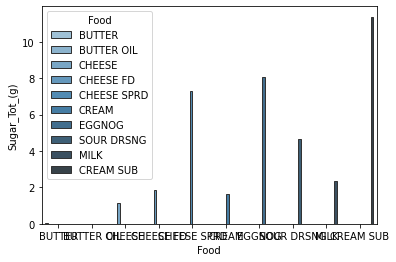

In [ ]:
mini=df[0:60]
sns.barplot(x="Food", y="Sugar_Tot_(g)", data=mini,palette="Blues_d",hue='Food',
             ci=None,errcolor=".2", edgecolor=".2")

In [ ]:
df.describe()

,Food_id,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Vit_C_(mg),Vit_B6_(mg),vitB12,Vit_A_IU,Cholestrl_(mg)
count,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000
mean,14603.224088,54.262987,225.614844,11.835935,10.678046,21.317087,6.028585,79.736865,2.798652,36.275768,290.130635,316.689061,2.175609,9.249067,0.295744,1.341210,724.257537,41.970858
std,8869.742258,30.167023,168.120639,10.744355,16.353345,26.923749,13.406397,222.130173,5.880264,59.675662,408.092462,1040.170405,3.617587,69.805625,0.528075,4.312127,3586.817519,122.856816
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8633.500000,32.017500,95.000000,2.470000,0.870000,0.000000,0.000000,10.000000,0.560000,13.000000,130.000000,35.000000,0.330000,0.000000,0.050000,0.000000,0.000000,0.000000
50%,13793.000000,62.630000,195.000000,8.770000,5.220000,8.820000,0.000000,22.000000,1.380000,22.000000,231.000000,80.000000,1.000000,0.000000,0.149000,0.200000,24.000000,4.000000
75%,19060.500000,76.865000,330.000000,20.320000,13.600000,30.895000,4.490000,68.000000,2.630000,30.000000,340.000000,400.000000,2.987500,3.300000,0.380000,1.480000,216.000000,68.000000
max,93600.000000,100.000000,902.000000,88.320000,100.000000,100.000000,99.800000,7364.000000,123.600000,781.000000,16500.000000,38758.000000,90.950000,2400.000000,12.000000,98.890000,100000.000000,3100.000000


***Data Analysis***

In [ ]:
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go

***Top 100 Carbohydrate rich foods***

In [ ]:
df= df.sort_values(by='Carbohydrt_(g)', ascending= False)
top_100=df.head(100)
fig = px.bar(top_100, x='Food', y='Carbohydrt_(g)' , color='Food',title=' Top 100 Carbohydrate rich foods')
fig.show()

***Top 50 Sugar rich foods***

In [ ]:
df= df.sort_values(by='Sugar_Tot_(g)', ascending= False)
top_50=df.head(50)
fig = px.bar(top_50, x='Food', y='Sugar_Tot_(g)' , color='Food',title=' Top 50 Sugar rich foods')
fig.show()

***Top 50 Fiber rich foods***

In [ ]:
df= df.sort_values(by='Water_(g)', ascending= False)
top_50=df.head(50)
fig = px.bar(top_50, x='Food', y='Water_(g)' , color='Food',title=' Top 50 Fiber rich foods')
fig.show()

***Top 50 Iron rich foods***

In [ ]:
df= df.sort_values(by='Iron_(mg)', ascending= False)
top_50=df.head(50)
fig = px.bar(top_50, x='Food', y='Iron_(mg)' , color='Food',title=' Top 50 Iron rich foods')
fig.show()

***Top 50 Vitamin B12 rich foods***

In [ ]:
df= df.sort_values(by='vitB12', ascending= False)
top_50=df.head(50)
fig = px.bar(top_50, x='Food', y='vitB12' , color='Food',title=' Top 50 Vitamin B12 rich foods')
fig.show()

In [ ]:
trace1 = go.Scatter3d(
    x=df['Carbohydrt_(g)'].values,
    y=df['Food'].values,
    z=df['Sugar_Tot_(g)'].values,
    text=df['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = df['Sugar_Tot_(g)'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Sugar (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of High Sugar foods (% Daily Value)')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='scatter3d')